# Arrays

To create a new field above, use 'a', below use 'b'

In [ ]:
# import numpy
import numpy as np

# making arrays
# To specify an array you make a list (more basic), and then you feed it to np.array
a_list= [1, 2, 3]
a = np.array(a_list)
b = np.array([[1,2],[3,4],[5,6]])
# Just print to see that there is different types
print 'a_list =', a_list, type(a_list) 
print 'a =',a, type(a), 'shape of a is',a.shape, 'number of dimensions in a is ', len(a.shape)
print 'b =\n',b, type(b)

a2 = np.array([[1],[2],[3]])
print a2.shape

In [41]:
# Functions to create arrays quickly

#Useful to prealocate the memory of the program. Faster than making the array row by row
b1 = np.zeros((4,3))
print 'b1 =\n', b1
b2 = np.ones((4,3))
print 'b2 =\n', b2
b3 = np.ones((4,5), dtype=np.int)
print 'Now with integers, b3 =\n', b3
#b4 = np.nan((4,2))
#print 'Now with nans, b4 =\n', b4
#zeros: arguments 
#1. shape of the new array (x,y,z...)
#2. datatype optional (in pribnciple float)
#3. row or columnwise order in the memory -Fortran or something-

b1 =
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
b2 =
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
Now with integers, b3 =
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [42]:
b1 = np.arange(3,7,1)
print b1

[3 4 5 6]
[[1 3 5]]


In [40]:
#How does python multiplies arrays?
#Normally it does it elementwise 'A*B'
print np.array([[3,2],[1,4]])*np.array([[1,0],[1,1]])
#Normal array arithmethics need to be specified as dot product -> np.dot(A,B)
print np.dot(np.array([[3,2],[1,4]]),np.array([[1,0],[1,1]]))

[[3 2]
 [1 4]]
[[3 0]
 [1 4]]
[[5 2]
 [5 4]]


# Markdown text
## How to do this
Esc+enter for new windows.

Then click 'm' to convert them in text windows


In [50]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])
b = np.transpose(a)

print a
print b

[ True  True  True  True  True  True  True  True]
[1 2 3 4 5 6 7 8]


In [ ]:
#array manip
A = np.random.randint(0,100,(5,5))
#print np.max(A)
#print A

C = np.arange(12).reshape(3,4)
#print C
#print np.transpose(C)

#print C**2 #Potenciacion

print 
print C[[0,1,2],1]
print C[-2:,-2:]

# For linear indexing you would need to use ravel/unravel functions

# Logical indexing

C_log= C%2==0
print C_log
print C[C_log]
print sum(C_log)
print sum(C_log,2) #NOPE

# Functions now

In [ ]:
def addme( a, b ):
   "This adds passed arguments."
   return a+b
print addme(2,5)
addme(2,5) #Output of the program if written like this!!!!

In [ ]:
def printme(str):
    '''Help goes here'''
    print str
    return
printme('Sup man')
help(printme)

In [ ]:
import numpy as np
def addme(a,b):
    """
    Returns the sum of the input
    Input: (a,b) type 'int' or 'float' arrays of equal dimensions
    """
    # Remember to make the functions array friendly
    return a+b # This  
print addme(np.array([2, 4, 6]),np.array([4,9,10]))

In [82]:
# Importing modules from other files

import module_example as modex

modex.print_func('yo waddup')

Hello :  yo waddup


# Excersises of Arrays

In [88]:
# Trying to tranpose line

a = np.array([1,2,3])
b = a[None] #What is happening here???
print a, len(a.shape)
print a[None], len(b.shape)
print a[None].T

[1 2 3] 1
[[1 2 3]] 2
[[1]
 [2]
 [3]]


In [182]:
# Calling all the libraries and creating all the functions

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

def Stochy(elements,init,t,Gamma,k,decay):
    # Write the reaction
    for i in range(0,Gamma.shape[1]): # Along the reactions
        reactants=list()
        products=list()
        Ri=Gamma[:,i]
        for j in range(0,Gamma.shape[0]): #Along the reactants
            if Ri[j]<0:
                reactants.append(str(abs(Ri[j]))+elements[j])
            elif Ri[j]>0:
                products.append(str(abs(Ri[j]))+elements[j])
            elif decay:
                for ele in decay:
                    if (ele[0],ele[1])==(j,i):
                        reactants.append(str(ele[2])+elements[j])
                        products.append(str(ele[2])+elements[j])
        print reactants,'--k' + str(i) + '-->' ,products  

    # Function to calculate V
    def calcV(init,Gamma,k):
        V=list()
        # Write the reaction and create V
        for i in range(0,Gamma.shape[1]):# Along the reactions
            Vi=1;
            Ri=Gamma[:,i]
            for j in range(0,Gamma.shape[0]): #Along the reactants
                if Ri[j]<0:
                    Vi*=(init[j]**abs(Ri[j]))
                elif decay:
                    for ele in decay:
                        if (ele[0],ele[1])==(j,i):
                            Vi*=(init[j]**ele[2])
            V.append(Vi*k[i])
        return V

    # ODE system (in format used for odeint)
    def myODE(init,t,Gamma,k):

        # rates
        V = calcV(init,Gamma,k)
        rates = np.dot(Gamma,V)
        return tuple(rates)
    # Solve using odeint
    solution = odeint(myODE,init,t,args=(Gamma,k,)) 
    fig, ax = plt.subplots()
    for i in range(0,Gamma.shape[0]):
        ax.plot(t, solution[:,i], label=elements[i])
    legend = ax.legend(loc='center', shadow=True)
    # Show over time
    plt.show()
    return solution


def Stochy2(user_input,reactions,t):
    
    #Create elements and rows
    row=dict()
    elements=list()
    init=list()
    for i in range(0,len(user_input),2):
        elements.append(user_input[i])
        row.update({user_input[i]:i/2})
        init.append(user_input[i+1])

    #Create Gamma and decay
    Gamma=np.zeros((len(elements),len(reactions)/3),int)
    decay = tuple()
    k = tuple()
    for j in range(0,len(reactions),3): # Reactants/ +1 Products/ +2 Konstants
        for ind in range(0,len(reactions[j]),2): # In the reactants, get the value for Gamma, and maybe decay
            sto = reactions[j][ind]
            name = reactions[j][ind+1]
            if sto>0:
                Gamma[row[name],j/3]=-sto;
            else:
                decay+=((row[name],j/3,abs(sto)),)
        for ind in range(0,len(reactions[j+1]),2): # In the products, get the value for Gamma
            sto = reactions[j+1][ind]
            name = reactions[j+1][ind+1]
            if sto>0:
                Gamma[row[name],j/3]=sto;
        k+=(reactions[j+2],)
    
    # Call Stochy
    return (Stochy(elements,init,t,Gamma,k,decay),row)

['1Receptor'] --k0--> []
['1Receptor', '1M3'] --k1--> ['1Receptor', '1M3P']
['1M3P'] --k2--> ['1M3']
['1M3P', '1M2'] --k3--> ['1M3P', '1M2P']
['1M2P'] --k4--> ['1M2']
['1M2P', '1M1'] --k5--> ['1M2P', '1M1P']
['1M1P'] --k6--> ['1M1']


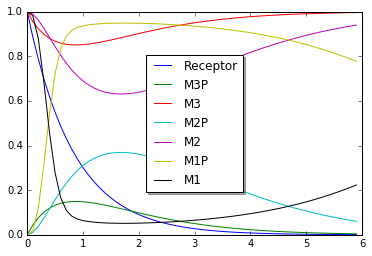

In [77]:
# Kinases Model
# Time
dt = 0.1
t = np.arange(0,6,dt)

# Parameters

elements = ['Receptor','M3P','M3','M2P','M2','M1P','M1']

Gamma = np.array([[-1, 0, 0, 0, 0, 0, 0],
                  [ 0, 1,-1, 0, 0, 0, 0],
                  [ 0,-1, 1, 0, 0, 0, 0],
                  [ 0, 0, 0, 1,-1, 0, 0],
                  [ 0, 0, 0,-1, 1, 0, 0],
                  [ 0, 0, 0, 0, 0, 1,-1],
                  [ 0, 0, 0, 0, 0,-1, 1]], int)


decay = ((0,1,1),(1,3,1),(3,5,1))

k = (1.2,0.5,1,5,1,50,1)

Receptor = 1.0
M3P = 0.0
M3 = 1.0
M2P = 0.0
M2 = 1.0
M1P = 0.0
M1 = 1.0
init = (Receptor, M3P, M3, M2P, M2, M1P, M1)
dummy=Stochy(elements,init,t,Gamma,k,decay)

['1Ssk1'] --k0--> []
['1Ssk1', '1Ssk2'] --k1--> ['1Ssk1', '1Ssk2P']
['1Ssk2P'] --k2--> ['1Ssk2']
['1Ssk2P', '1Pbs2'] --k3--> ['1Ssk2P', '1Pbs2P']
['1Pbs2P'] --k4--> ['1Pbs2']
['1Ssk2P', '1Pbs2P'] --k5--> ['1Ssk2P', '1Pbs2PP']
['1Pbs2PP'] --k6--> ['1Pbs2P']
['1Pbs2PP', '1Hog1'] --k7--> ['1Pbs2PP', '1Hog1P']
['1Hog1P'] --k8--> ['1Hog1']
['1Pbs2PP', '1Hog1P'] --k9--> ['1Pbs2PP', '1Hog1PP']
['1Hog1PP'] --k10--> ['1Hog1P']


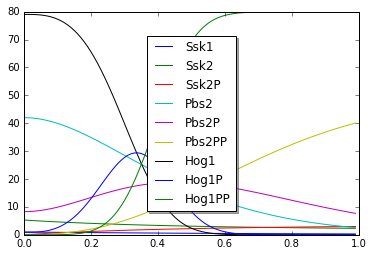

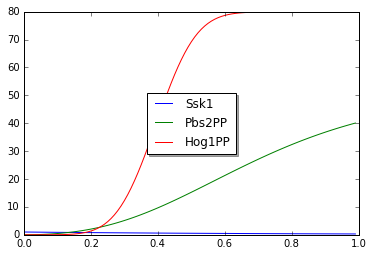

In [78]:
# Kinases Model II
# Time
dt = 0.01
t = np.arange(0,1,dt)

# Parameters

elements = ['Ssk1','Ssk2','Ssk2P','Pbs2','Pbs2P','Pbs2PP','Hog1','Hog1P','Hog1PP']

Gamma = np.array([[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [ 0,-1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [ 0, 1,-1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [ 0, 0, 0,-1, 1, 0, 0, 0, 0, 0, 0],
                  [ 0, 0, 0, 1,-1,-1, 1, 0, 0, 0, 0],
                  [ 0, 0, 0, 0, 0, 1,-1, 0, 0, 0, 0],
                  [ 0, 0, 0, 0, 0, 0, 0,-1, 1, 0, 0],
                  [ 0, 0, 0, 0, 0, 0, 0, 1,-1,-1, 1],
                  [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,-1],], int)


decay = ((0,1,1),(2,3,1),(2,5,1),(5,7,1),(5,9,1))

k = (1.2,1.438,0.011,1.438,0.011,1.438,0.011,1.438,0.011,1.438,0.011)



Ssk1 = 1
Ssk2 = 5.3
Ssk2P = 0
Pbs2 = 42
Pbs2P = 8.3
Pbs2PP = 0
Hog1 = 79
Hog1P = 0.9
Hog1PP = 0

init = [Ssk1,Ssk2,Ssk2P,Pbs2,Pbs2P,Pbs2PP,Hog1,Hog1P,Hog1PP]


solution = Stochy(elements,init,t,Gamma,k,decay)

fig, ax = plt.subplots()
for i in [0,5,8]:
    ax.plot(t, solution[:,i], label=elements[i])
legend = ax.legend(loc='center', shadow=True)
# Show over time
plt.show()

['1Ssk1'] --k0--> []
['1Ssk1', '1Ssk2'] --k1--> ['1Ssk1', '1Ssk2P']
['1Ssk2P'] --k2--> ['1Ssk2']
['1Ssk2P', '1Pbs2'] --k3--> ['1Ssk2P', '1Pbs2P']
['1Pbs2P'] --k4--> ['1Pbs2']
['1Ssk2P', '1Pbs2P'] --k5--> ['1Ssk2P', '1Pbs2PP']
['1Pbs2PP'] --k6--> ['1Pbs2P']
['1Pbs2PP', '1Hog1'] --k7--> ['1Pbs2PP', '1Hog1P']
['1Hog1P'] --k8--> ['1Hog1']
['1Pbs2PP', '1Hog1P'] --k9--> ['1Pbs2PP', '1Hog1PP']
['1Hog1PP'] --k10--> ['1Hog1P']
['1Hog1PP'] --k11--> ['1Hog1PPn']
['1Hog1PPn'] --k12--> ['1Hog1n']
['1Hog1n'] --k13--> ['1Hog1']
['1Hog1'] --k14--> ['1Hog1n']


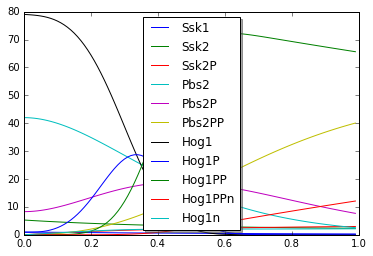

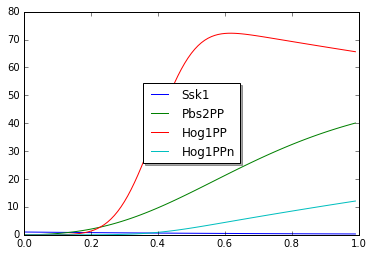

In [79]:
# Kinases Model III, including transcription
# Time
dt = 0.01
t = np.arange(0,1,dt)

# Parameters

elements = ['Ssk1','Ssk2','Ssk2P','Pbs2','Pbs2P','Pbs2PP',
            'Hog1','Hog1P','Hog1PP','Hog1PPn','Hog1n']

Gamma = np.array([[-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#ssk1
                  [ 0,-1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#ssk2
                  [ 0, 1,-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#ssk2P
                  [ 0, 0, 0,-1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#Pbs2
                  [ 0, 0, 0, 1,-1,-1, 1, 0, 0, 0, 0, 0, 0, 0, 0],#Pbs2P
                  [ 0, 0, 0, 0, 0, 1,-1, 0, 0, 0, 0, 0, 0, 0, 0],#Pbs2PP
                  [ 0, 0, 0, 0, 0, 0, 0,-1, 1, 0, 0, 0, 0, 1,-1],#Hog1
                  [ 0, 0, 0, 0, 0, 0, 0, 1,-1,-1, 1, 0, 0, 0, 0],#Hog1P
                  [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,-1,-1, 0, 0, 0],#Hog1PP
                  [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,-1, 0, 0],#Hog1PPn
                  [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,-1, 1],#Hog1n
                   ], int)


decay = ((0,1,1),(2,3,1),(2,5,1),(5,7,1),(5,9,1))

k = (1.2,1.438,0.011,1.438,0.011,1.438,0.011,1.438,0.011,1.438,0.011,
    0.29, 0.053,0.11,0.091)

Ssk1 = 1
Ssk2 = 5.3
Ssk2P = 0
Pbs2 = 42
Pbs2P = 8.3
Pbs2PP = 0
Hog1 = 79
Hog1P = 0.9
Hog1PP = 0



init = [Ssk1,Ssk2,Ssk2P,Pbs2,Pbs2P,Pbs2PP,Hog1,Hog1P,Hog1PP,0,0]


solution = Stochy(elements,init,t,Gamma,k,decay)

fig, ax = plt.subplots()
for i in [0,5,8,9]:
    ax.plot(t, solution[:,i], label=elements[i])
legend = ax.legend(loc='center', shadow=True)
# Show over time
plt.show()

['1Ssk1'] --k0--> []
['1Ssk1', '1Ssk2'] --k1--> ['1Ssk1', '1Ssk2P']
['1Ssk2P'] --k2--> ['1Ssk2']
['1Ssk2P', '1Pbs2'] --k3--> ['1Ssk2P', '1Pbs2P']
['1Pbs2P'] --k4--> ['1Pbs2']
['1Ssk2P', '1Pbs2P'] --k5--> ['1Ssk2P', '1Pbs2PP']
['1Pbs2PP'] --k6--> ['1Pbs2P']
['1Pbs2PP', '1Hog1'] --k7--> ['1Pbs2PP', '1Hog1P']
['1Hog1P'] --k8--> ['1Hog1']
['1Pbs2PP', '1Hog1P'] --k9--> ['1Pbs2PP', '1Hog1PP']
['1Hog1PP'] --k10--> ['1Hog1P']


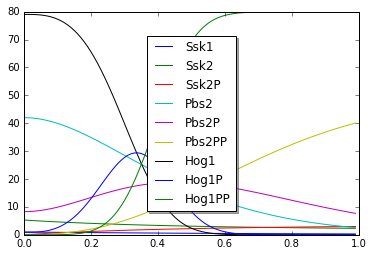

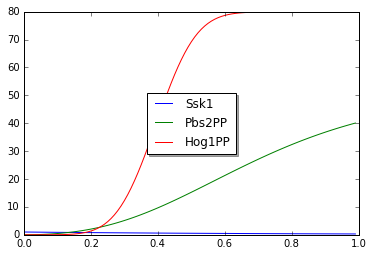

In [166]:
#Trying to make everything from the reactions only 
# Kinases Model II
# Time
dt = 0.01
t = np.arange(0,1,dt)

# Parameters

user_input=['Ssk1',1,
            'Ssk2',5.3,
            'Ssk2P',0,
            'Pbs2',42,
            'Pbs2P',8.3,
            'Pbs2PP',0,
            'Hog1',79,
            'Hog1P',0.9,
            'Hog1PP',0,]


k = (1.2,1.438,0.011,1.438,0.011,1.438,0.011,1.438,0.011,1.438,0.011,
    0.29, 0.053,0.11,0.091)

#Empty reaction ((stoch_1,reactant_1,stoch_2,reactant_2),(stoch_1,product_1,stoch_2,product_2),k)
reactions =(
    
 ( 1,'Ssk1'),(),k[0],
    
 (-1,'Ssk1',1,'Ssk2'),(1,'Ssk2P'),k[1],
 
 ( 1,'Ssk2P'),(1,'Ssk2'),k[2],
 
 (-1,'Ssk2P',1,'Pbs2'),(1,'Pbs2P'),k[3],
 
 ( 1,'Pbs2P'),(1,'Pbs2'),k[4],

 (-1,'Ssk2P',1,'Pbs2P'),(1,'Pbs2PP'),k[5],
 
 ( 1,'Pbs2PP'),(1,'Pbs2P'),k[6],
 
 (-1,'Pbs2PP',1,'Hog1'),(1,'Hog1P'),k[7],
 
 ( 1,'Hog1P'),(1,'Hog1'),k[8],
 
 (-1,'Pbs2PP',1,'Hog1P'),(1,'Hog1PP'),k[9],
 
 ( 1,'Hog1PP'),(1,'Hog1P'),k[10])

(solution, names) = Stochy2(user_input,reactions,t)

fig, ax = plt.subplots()

for i in [0,5,8]:
    ax.plot(t, solution[:,i], label=names[i])
legend = ax.legend(loc='center', shadow=True)
# Show over time
plt.show()

['1Ssk1'] --k0--> []
['1Ssk1', '1Ssk2'] --k1--> ['1Ssk1', '1Ssk2P']
['1Ssk2P'] --k2--> ['1Ssk2']
['1Ssk2P', '1Pbs2'] --k3--> ['1Ssk2P', '1Pbs2P']
['1Pbs2P'] --k4--> ['1Pbs2']
['1Ssk2P', '1Pbs2P'] --k5--> ['1Ssk2P', '1Pbs2PP']
['1Pbs2PP'] --k6--> ['1Pbs2P']
['1Pbs2PP', '1Hog1'] --k7--> ['1Pbs2PP', '1Hog1P']
['1Hog1P'] --k8--> ['1Hog1']
['1Pbs2PP', '1Hog1P'] --k9--> ['1Pbs2PP', '1Hog1PP']
['1Hog1PP'] --k10--> ['1Hog1P']
['1Hog1PP'] --k11--> ['1Hog1PPn']
['1Hog1PPn'] --k12--> ['1Hog1n']
['1Hog1n'] --k13--> ['1Hog1']
['1Hog1'] --k14--> ['1Hog1n']


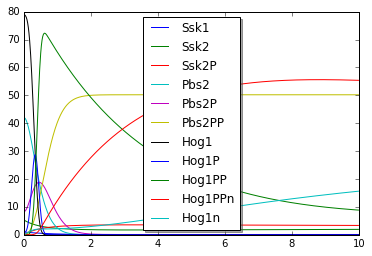

0


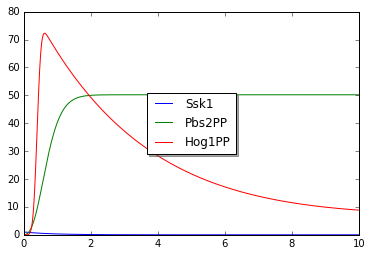

In [187]:
# Kinases Model III, including transport to the nucleus
# Time
dt = 0.01
t = np.arange(0,10,dt)

# Parameters

user_input=['Ssk1',1,
            'Ssk2',5.3,
            'Ssk2P',0,
            'Pbs2',42,
            'Pbs2P',8.3,
            'Pbs2PP',0,
            'Hog1',79,
            'Hog1P',0.9,
            'Hog1PP',0,
            'Hog1PPn',0,
            'Hog1n',0]


k = (1.2,1.438,0.011,1.438,0.011,1.438,0.011,1.438,0.011,1.438,0.011,
    0.29, 0.053,0.11,0.091)

# Reaction ((stoch_1,reactant_1,stoch_2,reactant_2),(stoch_1,product_1,stoch_2,product_2),k)
# Stochiometry is -1 if  

reactions =( 
###########################################
 ( 1,'Ssk1'),(),k[0],
    
 (-1,'Ssk1',1,'Ssk2'),(1,'Ssk2P'),k[1],
 
 ( 1,'Ssk2P'),(1,'Ssk2'),k[2],
 
 (-1,'Ssk2P',1,'Pbs2'),(1,'Pbs2P'),k[3],
 
 ( 1,'Pbs2P'),(1,'Pbs2'),k[4],

 (-1,'Ssk2P',1,'Pbs2P'),(1,'Pbs2PP'),k[5],
 
 ( 1,'Pbs2PP'),(1,'Pbs2P'),k[6],
 
 (-1,'Pbs2PP',1,'Hog1'),(1,'Hog1P'),k[7],
 
 ( 1,'Hog1P'),(1,'Hog1'),k[8],
 
 (-1,'Pbs2PP',1,'Hog1P'),(1,'Hog1PP'),k[9],
 
 ( 1,'Hog1PP'),(1,'Hog1P'),k[10],

 ( 1,'Hog1PP'),(1,'Hog1PPn'),k[11],

 ( 1,'Hog1PPn'),(1,'Hog1n'),k[12],

 ( 1,'Hog1n'),(1,'Hog1'),k[13],

 ( 1,'Hog1'),(1,'Hog1n'),k[14]

)#############################################

[solution, row] = Stochy2(user_input,reactions,t)
fig, ax = plt.subplots()

for i in ['Ssk1','Pbs2PP','Hog1PP']:
    ax.plot(t, solution[:,row[i]], label=i)
legend = ax.legend(loc='center', shadow=True)
# Show over time
plt.show()

['1Ssk1'] --k0--> []
['1Ssk1', '1Ssk2'] --k1--> ['1Ssk1', '1Ssk2P']
['1Ssk2P'] --k2--> ['1Ssk2']
['1Ssk2P', '1Pbs2'] --k3--> ['1Ssk2P', '1Pbs2P']
['1Pbs2P'] --k4--> ['1Pbs2']
['1Ssk2P', '1Pbs2P'] --k5--> ['1Ssk2P', '1Pbs2PP']
['1Pbs2PP'] --k6--> ['1Pbs2P']
['1Pbs2PP', '1Hog1'] --k7--> ['1Pbs2PP', '1Hog1P']
['1Hog1P'] --k8--> ['1Hog1']
['1Pbs2PP', '1Hog1P'] --k9--> ['1Pbs2PP', '1Hog1PP']
['1Hog1PP'] --k10--> ['1Hog1P']
['1Hog1PP'] --k11--> ['1Hog1PPn']
['1Hog1PPn'] --k12--> ['1Hog1n']
['1Hog1n'] --k13--> ['1Hog1']
['1Hog1'] --k14--> ['1Hog1n']
['1Hog1PPn'] --k15--> ['1Hog1PPn', '1mRNAn']
['1mRNAn'] --k16--> ['1mRNAc']
['1mRNAc'] --k17--> []
['1mRNAc'] --k18--> ['1mRNAc', '1Prot']
['1Prot'] --k19--> []


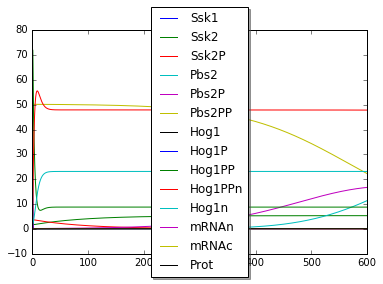

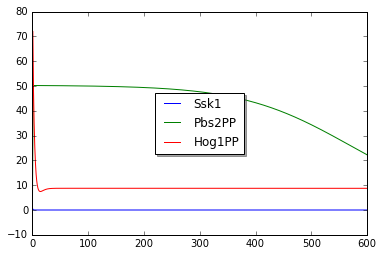

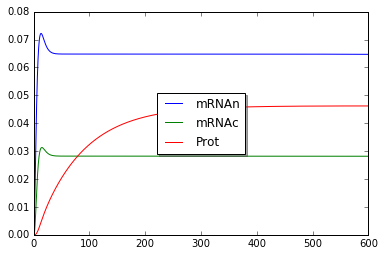

In [212]:
# Kinases Model III, including transport to the nucleus and transcription/translation 
# Time
dt = 0.1
t = np.arange(0,600,dt)

# Parameters

user_input=['Ssk1',1,
            'Ssk2',5.3,
            'Ssk2P',0,
            'Pbs2',42,
            'Pbs2P',8.3,
            'Pbs2PP',0,
            'Hog1',79,
            'Hog1P',0.9,
            'Hog1PP',0,
            'Hog1PPn',0,
            'Hog1n',0,
            'mRNAn',0,
            'mRNAc',0,
            'Prot',0]


k = (1.2,1.438,0.011,1.438,0.011,1.438,0.011,1.438,0.011,1.438,0.011,
    0.29, 0.053,0.11,0.091)

# Reaction ((stoch_1,reactant_1,stoch_2,reactant_2),(stoch_1,product_1,stoch_2,product_2),k)
# Stochiometry is -1 if the reactant acts as a catalyzer/enzyme

reactions =(
###########################################
 ( 1,'Ssk1'),(),k[0],
    
 (-1,'Ssk1',1,'Ssk2'),(1,'Ssk2P'),k[1],
 
 ( 1,'Ssk2P'),(1,'Ssk2'),k[2],
 
 (-1,'Ssk2P',1,'Pbs2'),(1,'Pbs2P'),k[3],
 
 ( 1,'Pbs2P'),(1,'Pbs2'),k[4],

 (-1,'Ssk2P',1,'Pbs2P'),(1,'Pbs2PP'),k[5],
 
 ( 1,'Pbs2PP'),(1,'Pbs2P'),k[6],
 
 (-1,'Pbs2PP',1,'Hog1'),(1,'Hog1P'),k[7],
 
 ( 1,'Hog1P'),(1,'Hog1'),k[8],
 
 (-1,'Pbs2PP',1,'Hog1P'),(1,'Hog1PP'),k[9],
 
 ( 1,'Hog1PP'),(1,'Hog1P'),k[10],

 ( 1,'Hog1PP'),(1,'Hog1PPn'),k[11],

 ( 1,'Hog1PPn'),(1,'Hog1n'),k[12],

 ( 1,'Hog1n'),(1,'Hog1'),k[13],

 ( 1,'Hog1'),(1,'Hog1n'),k[14],

 (-1,'Hog1PPn'),(1,'mRNAn'),0.0005,
    
 ( 1,'mRNAn'),(1,'mRNAc'),0.37,

 ( 1,'mRNAc'),(),0.85,

 (-1,'mRNAc'),(1,'Prot'),0.0205,

 ( 1,'Prot'),(),0.0125,
    
)#############################################


[solution, row] = Stochy2(user_input,reactions,t)
fig, ax = plt.subplots()

for i in ['Ssk1','Pbs2PP','Hog1PP']:
    ax.plot(t, solution[:,row[i]], label=i)
    
legend = ax.legend(loc='center', shadow=True)
# Show over time
plt.show()

fig, ax = plt.subplots()
for i in ['mRNAn','mRNAc','Prot']:
    ax.plot(t, solution[:,row[i]], label=i)
    
legend = ax.legend(loc='center', shadow=True)
# Show over time
plt.show()